In [1]:
!wget "ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip"

--2020-08-07 11:19:46--  ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip
           => ‘cell_images.zip.1’
Resolving lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)... 130.14.55.35, 2607:f220:41e:7055::35
Connecting to lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)|130.14.55.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Open-Access-Datasets/Malaria ... done.
==> SIZE cell_images.zip ... 353452851
==> PASV ... done.    ==> RETR cell_images.zip ... done.
Length: 353452851 (337M) (unauthoritative)

cell_images.zip.1   100%[===================>] 337.08M  1.34MB/s    in 93s     

2020-08-07 11:21:21 (3.61 MB/s) - ‘cell_images.zip.1’ saved [353452851]



In [2]:
!unzip cell_images.zip

Archive:  cell_images.zip
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
print(tf.__version__)

2.3.0


In [5]:
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
np.random.seed(0)

In [7]:
width = 64
height = 64

In [8]:
data = ImageDataGenerator(rescale = 1/255.0, 
                          validation_split = 0.2)

In [9]:
train = data.flow_from_directory(directory = '/content/cell_images', 
                                 target_size = (width, height), 
                                 class_mode = 'binary', 
                                 batch_size = 16, 
                                 subset = 'training')

Found 22048 images belonging to 2 classes.


In [10]:
valid = data.flow_from_directory(directory = '/content/cell_images', 
                                 target_size = (width, height), 
                                 class_mode = 'binary', 
                                 batch_size = 16, 
                                 subset = 'validation')

Found 5510 images belonging to 2 classes.


In [11]:
train.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [12]:
valid.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [13]:
model = Sequential() 

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation="relu", input_shape = (width, height, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation="relu", input_shape = (width, height, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation="relu", input_shape = (width, height, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
model_history = model.fit_generator(generator = train, steps_per_epoch = len(train), epochs = 5, 
                    validation_data = valid, validation_steps = len(valid))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1378/1378 [==============================] - 26s 19ms/step - loss: 0.4561 - accuracy: 0.7487 - val_loss: 0.1609 - val_accuracy: 0.9441
Epoch 2/5
1378/1378 [==============================] - 26s 19ms/step - loss: 0.1734 - accuracy: 0.9495 - val_loss: 0.1591 - val_accuracy: 0.9481
Epoch 3/5
1378/1378 [==============================] - 26s 19ms/step - loss: 0.1528 - accuracy: 0.9546 - val_loss: 0.1560 - val_accuracy: 0.9481
Epoch 4/5
1378/1378 [==============================] - 27s 19ms/step - loss: 0.1457 - accuracy: 0.9547 - val_loss: 0.1584 - val_accuracy: 0.9454
Epoch 5/5
1378/1378 [==============================] - 26s 19ms/step - loss: 0.1389 - accuracy: 0.9575 - val_loss: 0.1579 - val_accuracy: 0.9477


In [16]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

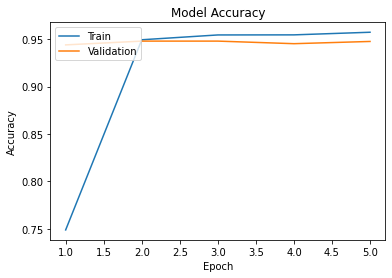

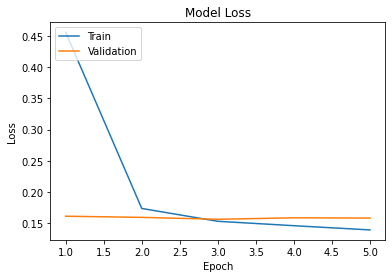

In [17]:
plotLearningCurve(model_history, 5)